#  GISAXS (Grazing-incidence small angle X-ray scattering geometry)

### More details skbeam.core.recip module: gisaxs function.
### (https://github.com/scikit-beam/scikit-beam/blob/master/skbeam/core/recip.py)

In [42]:
import skbeam.core.recip as recip
import skbeam.core.utils as utils
import skbeam.core.roi as roi

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## get the inputs

In [2]:
inc_x0 = 1871   # incident beam x component in pixels
inc_y0 = 339    # incident beam y component in pixels
refl_x0 = 1871   # refelcted beam x component in pixels
refl_y0 = 811    # refelcted beam y component in pixels    
dist_sample = 4.81  # distance to the sample in mm
wavelength = 1.3776 #  wavelength of the X-ray beam in um

dpix = 7.5000004e-02*1000  # pixel size


In [3]:
pixel_size = (dpix, dpix)
incident_beam = (inc_x0, inc_y0)
reflected_beam = (refl_x0, refl_y0)
detector_size = (2167, 2070)

In [4]:
g_output = recip.gisaxs(incident_beam, reflected_beam, pixel_size,
                        detector_size, dist_sample, wavelength,
                        theta_i=0.0)

### Incident Angle

In [5]:
g_output.alpha_i    

0.0036797674392063757

## Tilt Angle

In [6]:
g_output.tilt_angle

0.0

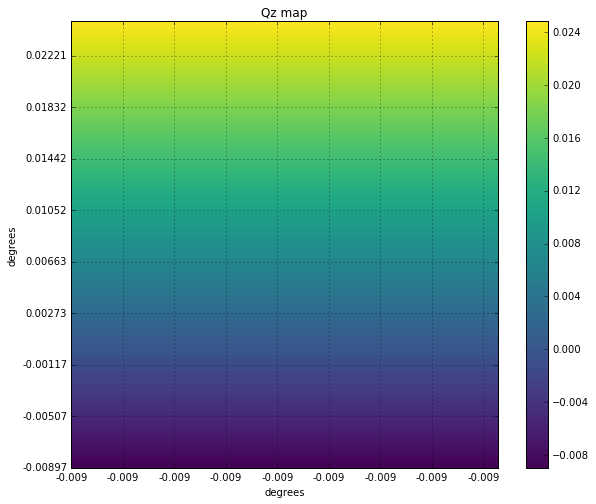

In [28]:
x_ticks = []
y_ticks = []
for i in range(0, 2250, 250):
    x_ticks.append(round(g_output.alpha_f[0, i], 4))
    y_ticks.append(round(g_output.alpha_f[i, 0], 5))
    
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(g_output.alpha_f, cmap="viridis", origin="lower")
ax.set_title("Exit angle map")
ax.set_xlabel('degrees')
ax.set_ylabel('degrees')
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(x_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(y_ticks)
ax.grid()
fig.colorbar(im)
plt.show()

## Qz map  ( z component of scattering wave vector)

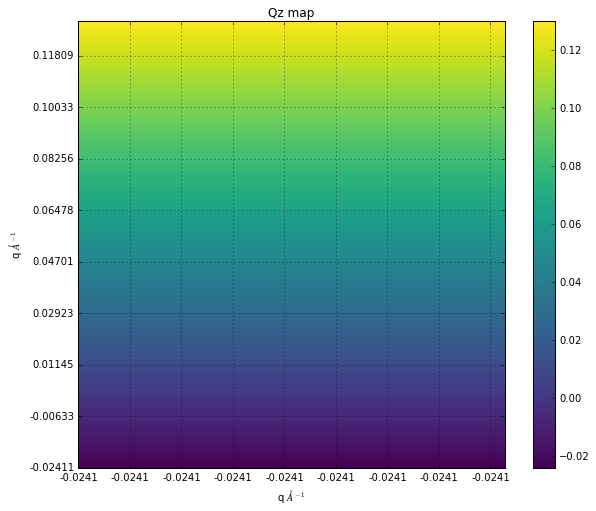

In [25]:
x_ticks = []
y_ticks = []
for i in range(0, 2250, 250):
    x_ticks.append(round(g_output.qz[0, i], 4))
    y_ticks.append(round(g_output.qz[i, 0], 5))
    
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(g_output.qz, cmap="viridis", origin="lower")
ax.set_title("Qz map")
ax.set_xlabel('q 'r'$\AA^{-1}$')
ax.set_ylabel('q 'r'$\AA^{-1}$')
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(x_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(y_ticks)
ax.grid()
fig.colorbar(im)
plt.show()

## Qr (parrell component of the scattering wave vector)

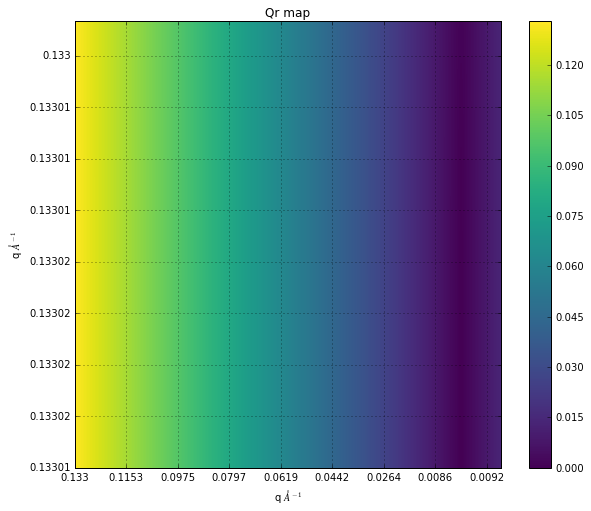

In [24]:
xr_ticks = []
yr_ticks = []
for i in range(0, 2250, 250):
    xr_ticks.append(round(g_output.qr[0, i], 4))
    yr_ticks.append(round(g_output.qr[i, 0], 5))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(g_output.qr, cmap="viridis", origin="lower")
ax.set_title("Qr map")
ax.set_xlabel('q 'r'$\AA^{-1}$')
ax.set_ylabel('q 'r'$\AA^{-1}$')
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(xr_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(yr_ticks)
ax.grid()
fig.colorbar(im)
plt.show()

In [77]:
qr_edges = roi.ring_edges(0.015, 0.015, spacing=0.002, num_rings=4)
qz_edges = roi.ring_edges(0.011, 0.011, spacing=0.002, num_rings=4)

In [78]:
def label(edges, center, shape):
    """
    Draw annual (ring-shaped) regions of interest, or bin the shape into label
    array

    Each roi will be labeled with an integer. Regions outside any ring will
    be filled with zeros.

    Parameters
    ----------
    edges: list
        giving the inner and outer edges of each roi
        e.g., [(1, 2), (11, 12), (21, 22)]
    center : tuple or array
        1. For ring shaped roi's give the center (tuple)
           point in image where r=0; may be a float giving subpixel precision.
           Order is (rr, cc), optional
        2. Convert a shape to a label array (array)
    shape: tuple
        Image shape which is used to determine the maximum extent of output
        pixel coordinates. Order is (rr, cc).

    Returns
    -------
    label_array : array
        Elements not inside any ROI are zero; elements inside each
        ROI are 1, 2, 3, corresponding to the order they are specified
        in edges.
    """
    edges = np.atleast_2d(np.asarray(edges)).ravel()
    if not 0 == len(edges) % 2:
        raise ValueError("edges should have an even number of elements, "
                         "giving inner, outer edges for each roi")
    if not np.all(np.diff(edges) >= 0):
        raise ValueError("edges are expected to be monotonically increasing, "
                         "giving inner and outer edges of each roi from "
                         "r=0 outward")
    if isinstance(center, tuple):
        r_coord = utils.radial_grid(center, shape).ravel()
    else:
        r_coord = center.ravel()
    label_array = np.digitize(r_coord, edges, right=False)
    # Even elements of label_array are in the space between roi.
    label_array = (np.where(label_array % 2 != 0, label_array, 0) + 1) // 2
    return label_array.reshape(shape)

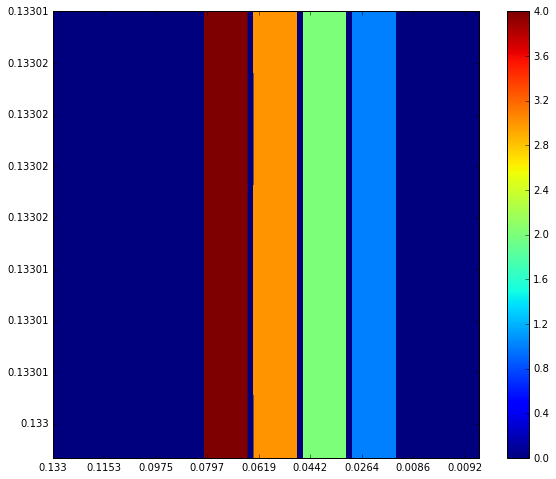

In [79]:
label_qr = rings(qr_edges, qr, qr.shape)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(label_qr)
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(xr_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(yr_ticks)
fig.colorbar(im)
plt.show()

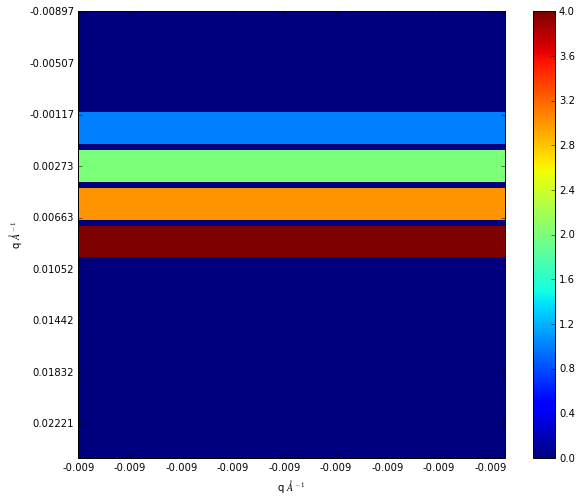

In [80]:
label_qz = rings(qz_edges, qz, qz.shape)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(label_qz)
ax.set_xlabel('q 'r'$\AA^{-1}$')
ax.set_ylabel('q 'r'$\AA^{-1}$')
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(x_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(y_ticks)
fig.colorbar(im)
plt.show()

In [87]:
np.unique(label_qz), np.unique(label_qr)


(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

array([ 0,  1,  2,  3,  4,  6,  8,  9, 12, 16])

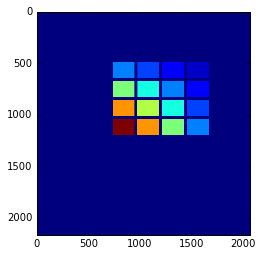

In [88]:
label_array = label_qr*label_qz

plt.imshow(label_array)

np.unique(label_array)

In [9]:
import skbeam
skbeam.__version__

'0.0.7+35.g6ef02ed.dirty'